# Table of Contents
## Introduction
1. [Business Goal](#Business-Goal)
2. [Data Overview](#Data-Overview)
3. [Variable Descriptions](#Variable-Descriptions)
4. [Data Quality Check](#Data-Quality-Check)

## Exploratory Data Analysis
1. [Numerical Variables](#Numerical-Variables)
2. [Categorical Variables](#Categorical-Variables)
3. [Factors Impacting](#Factors-Impacting)
   1. [Income](#Income)
   2. [Work Experience](#Work-Experience)
   3. [Salary Hike](#Salary-Hike)
   4. [Age](#Age)
   5. [Work Life Balance](#Work-Life-Balance)
   6. [Years With Current Manager](#Years-With-Current-Manager)
   7. [Department](#Department)
 
## Feature Engineering
1. [Correlation](#Correlation)
2. [Encoding](#Encoding)
3. [Standarization](#Standarization)

## Model Training 
1. [Split Dataset](#Split-Dataset)
2. [Naive Approach](#Naive-Approach)
3. [Models](#Models)
   1. [Logistic Regression](#Logistic-Regression)
   2. [KNN](#KNN)
   3. [Support Vector Machine](#Support-Vector-Machine)
   4. [Random Forest](#Random-Forest)
   5. [Decision Tree](#Decision-Tree)
   6. [Neural Network](#Neural-Network)
   7. [XG Boost](#XG-Boost)

## Performance Evaluation 
1. [Confusion Matrix](#Confusion-Matrix)
2. [ROC Curve](#ROC-Curve)

## Feature Selection 
1. [Random Forest](#Random-Forest)
2. [Lasso Regression](#Lasso-Regression)

***

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Introduction</p></div>

<a id='Business-Goal'></a>
### <b><span style='color:#68A19B'>1</span> | Business Goal</b>
In the age of the Great Resignation, employee retention strategies have become a top priority for many businesses. Employees leave organizations for a number of reasons that differ from industry to industry. In this case study, I'll look at some of the similarities between former employees and identify major factors of attrition in order to help the HR department improve their retention efforts and lower attrition rates more proactively.

***
<a id='Data-Overview'></a>
### <b><span style='color:#68A19B'>2</span> | Data Overview</b>
In this notebook, I will analyze IBM's [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. A quick overview and summary statistics of the data are provided below.

In [1]:
__author__ = "Karthik Mummidisetti"
__email__ = "ikmlkarthik@gmail.com"

In [2]:
import sys
#!{sys.executable} -m pip install xgboost

# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn") #using the seaborn style for graphs

#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
def read_data(file):
    return pd.read_csv(file)

def drop_columns(df, col_list):
    data = df.drop(col_list, axis=1)
    return data

def get_shape(df):
    print('Now there are', df.shape[0], 'rows and',df.shape[1],'columns in this dataset')

In [4]:
# Load data
df = read_data("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("There are {:,} rows and {} columns in the data.".format(df.shape[0], df.shape[1]))

# Check for missing data
print("There are {} missing values in the data.".format(df.isnull().sum().sum()))

pd.set_option('display.max_columns', None)
df.head()

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


***
<a id='Variable-Descriptions'></a>
### <b><span style='color:#68A19B'>3</span> | Variable Descriptions</b>
- **Age**: numerical	  
- **Attrition**: (response) Yes/No, categorical	  
- **BusinessTravel**: nominal, levels: 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'   
- **DailyRate**: numerical  
- **Department**: nominal, levels: 'Sales', 'Research & Development', 'Human Resources'  
- **DistanceFromHome**: numerical	  
- **Education**: ordinal, levels: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor' (encoded as numbers 1-5)  
- **EducationField**: nominal, levels: 'Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'	  
- **EmployeeCount**: number of employyes corresponding to employee number (it is 1 for each observation)  
- **EmployeeNumber**: unique employee identification, numerical  
- **EnvironmentSatisfaction**: ordinal, levels: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' (encoded as numbers 1-4)  
- **Gender**: nominal, levels: Male, Female	  
- **HourlyRate**: numerical	  
- **JobInvolvement**: ordinal, levels: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' (encoded as numbers 1-4)  
- **JobLevel**: ordinal, levels: 1, 2, 3, 4, 5	  
- **JobRole**: nominal, 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'	  
- **JobSatisfaction**: ordinal, levels: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' (encoded as numbers 1-4)	  
- **MaritalStatus**: nominal, levels: 'Single', 'Married', 'Divorced'	  
- **MonthlyIncome**: numerical	  
- **MonthlyRate**: numerical  
- **NumCompaniesWorked**: numerical	  
- **Over18**: categorical, Yes/No (however, all employees were over 18)	  
- **OverTime**: categorical, Yes/No  
- **PercentSalaryHike**: numerical	  
- **PerformanceRating**: ordinal, levels: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding' (encoded as numbers 1-4)	 
- **RelationshipSatisfaction**: ordinal, levels: 1 'Low', 2 'Medium', 3 'High', 4 'Very High' (encoded as numbers 1-4)	 	
- **StandardHours**: numerical (80 hours for each employee)	  
- **StockOptionLevel**: ordinal, levels: 0-3	  
- **TotalWorkingYears**: numerical	  
- **TrainingTimesLastYear**: numerical		  
- **WorkLifeBalance**: ordinal, levels: 1 'Bad', 2 'Good', 3 'Better', 4 'Best' (encoded as numbers 1-4)	  
- **YearsAtCompany**: numerical		  
- **YearsInCurrentRole**: numerical		  
- **YearsSinceLastPromotion**: numerical		
- **YearsWithCurrManager**: numerical	  

***
<a id='Data-Quality-Check'></a>
### <b><span style='color:#68A19B'>4</span> | Data Quality Check</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Check the type of our features. Are there any data inconsistencies?
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.describe() #numerical columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include = ['O']) #categorical columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
cat_df

count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

In [10]:
col_list = ['EmployeeCount', 'StandardHours', 'Over18']
df = drop_columns(df, col_list)

Dropped columns: Employee Count, StandardHours and Over18. 
1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we could definitely drop it as well.
3. Column 'Over18' is another interesting column which tells us every employee in this dataset is over 18 and we will drop it as well.

In [11]:
df.isnull().any() # check to see if there are any missing values in our data set

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrent

In [12]:
df.duplicated().sum() # check to see if there are any duplicates in our data set

0

No     1233
Yes     237
Name: Attrition, dtype: int64

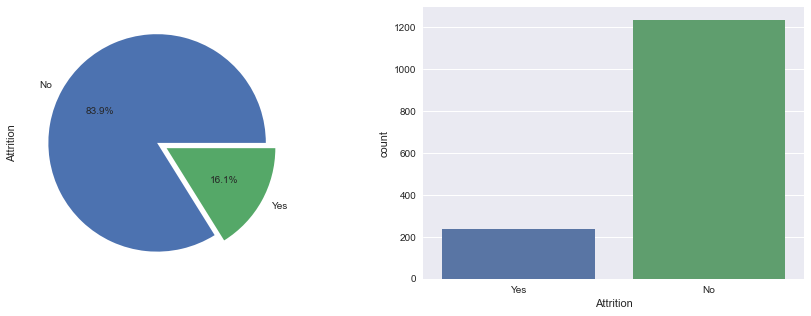

In [13]:
# check distribution for target variable
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',explode = (0, 0.1))
plt.subplot(1,2,2)
sns.countplot(x = 'Attrition', data = df);
plt.savefig('attrition.png')
df['Attrition'].value_counts()

237 employees out of 1470 left the company. Since dataset is highly imbalance as the label class has only 16.1% of yes and 83.9% of no category, we will need to use Oversampling / Undersampling for modeling part.

***
# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Exploratory Data Analysis</p></div>

In this study, we want to see whether there are any correlations between different amounts of variables and attrition.

In [14]:
get_shape(df)

Now there are 1470 rows and 32 columns in this dataset


***
<a id='Numerical-Variables'></a>
### <b><span style='color:#68A19B'>1</span> | Numerical Variables</b>

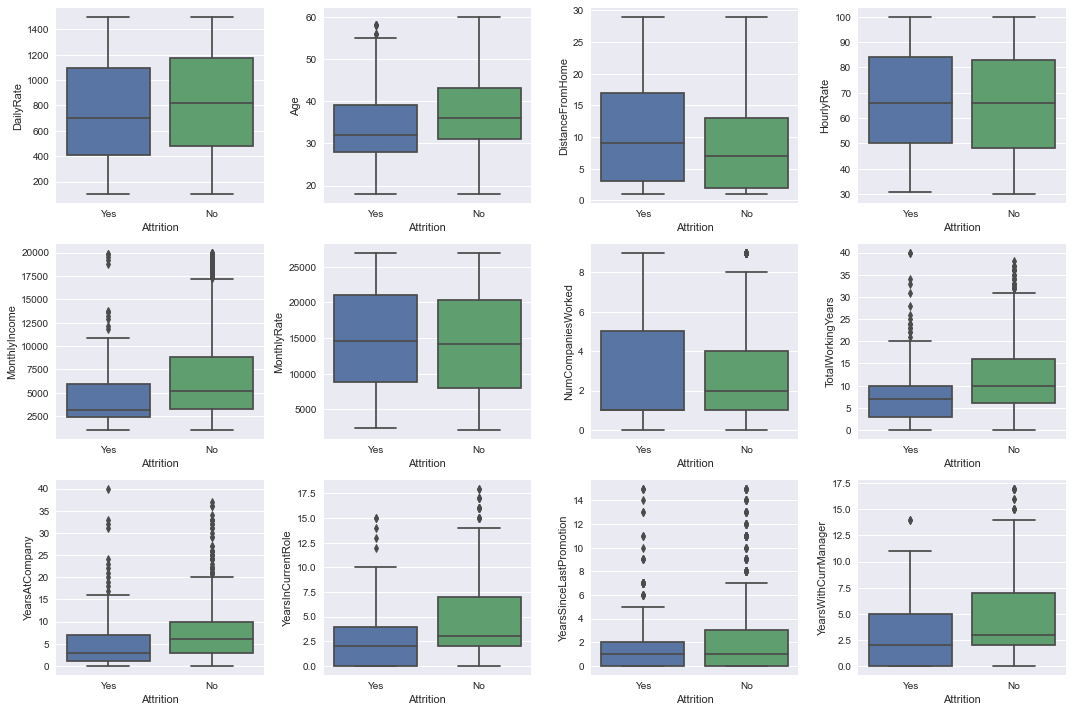

In [15]:
# visualization for numerical variables
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][0])
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][2])
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3])
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0])
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1])
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][2])
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][3])
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0])
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1])
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2])
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3])
plt.tight_layout()
plt.savefig('num_dist.png');

***
<a id='Categorical-Variables'></a>
### <b><span style='color:#68A19B'>2</span> | Categorical Variables</b>

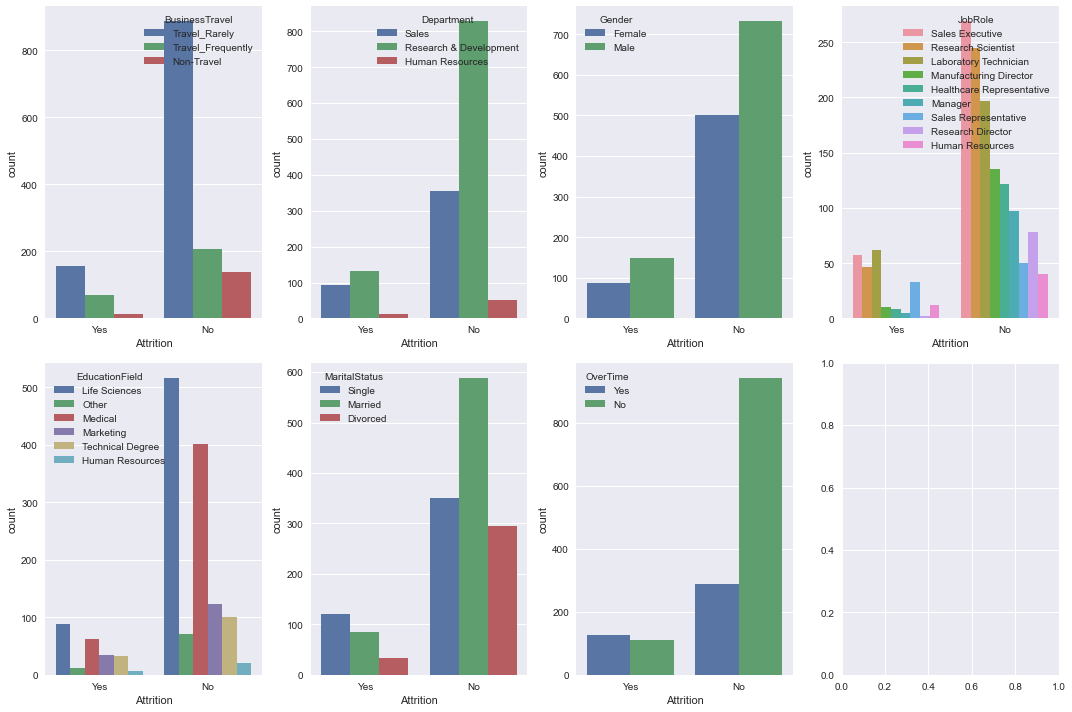

In [16]:
# visualization for non numerical variables
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()
plt.savefig('cat_dist.png');

***
<a id='Factors-Impacting'></a>
### <b><span style='color:#68A19B'>3</span> | Factors Impacting</b>

***
<a id='Income'></a>
#### <b><span style='color:#68A19B'>3.1</span> | Income</b>

In [17]:
income_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
income_att['MonthlyIncome']=round(income_att['MonthlyIncome'],-3)
income_att=income_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')

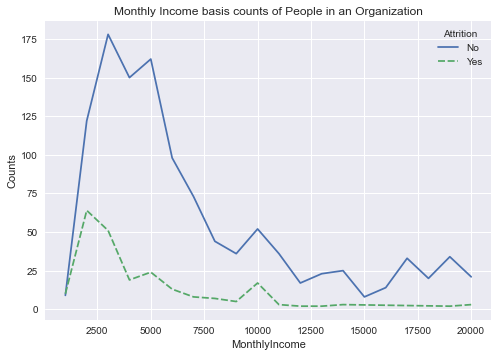

In [18]:
sns.lineplot(data=income_att, 
             x="MonthlyIncome", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Monthly Income basis counts of People in an Organization')
plt.savefig('income_att.png');

1. From the plot, the attrition rate is evidently high at very low income levels - less than 5k monthly. 
2. This decreases further - but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. 
3. When the monthly income is pretty decent, the chances of an employee leaving the organization is low - as seen by the flat line

***
<a id='Work-Experience'></a>
#### <b><span style='color:#68A19B'>3.2</span> | Work experience</b>

In [19]:
ncwrd_att=df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

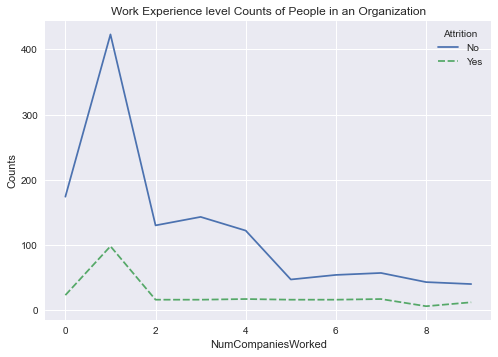

In [20]:
sns.lineplot(data=ncwrd_att, 
             x="NumCompaniesWorked", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Work Experience level Counts of People in an Organization')
plt.savefig('wrkexp_att.png');

1. From the plot, clearly, employees who started their career with the company - or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. 
2. People who have gained much experience - working in multiple companies tend to stay in the company they join.

***
<a id='Salary-Hike'></a>
#### <b><span style='color:#68A19B'>3.3</span> | Salary Hike</b>

In [21]:
hike_att=df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

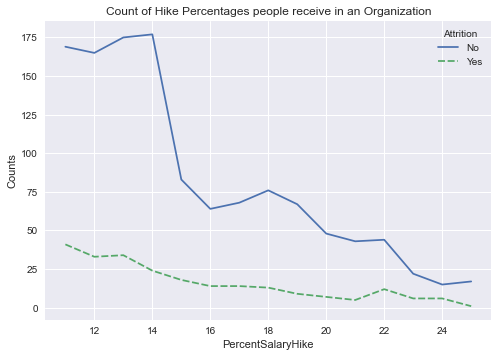

In [22]:
sns.lineplot(data=hike_att, 
             x="PercentSalaryHike", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Count of Hike Percentages people receive in an Organization')
plt.savefig('hike_att.png');

1. Higher hikes motivate people to work better, and stay in the organization. 
2. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

***
<a id='Age'></a>
#### <b><span style='color:#68A19B'>3.4</span> | Age</b>

In [23]:
age_att=df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

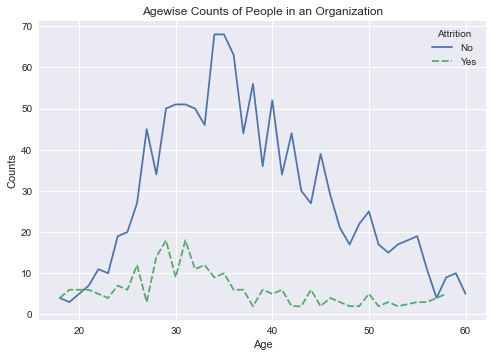

In [24]:
sns.lineplot(data=age_att, 
             x="Age", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Agewise Counts of People in an Organization')
plt.savefig('age_att.png');

1. From the plot, the attrition is maximum between the age groups 28-32. 
2. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. 
3. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

***
<a id='Work-Life-Balance'></a>
#### <b><span style='color:#68A19B'>3.5</span> | Work Life Balance</b>

In [25]:
wlb_att=df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

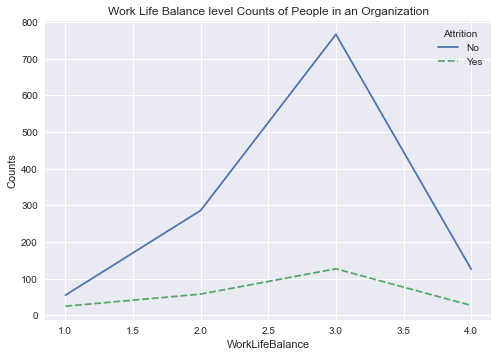

In [26]:
sns.lineplot(data=wlb_att, 
             x="WorkLifeBalance", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Work Life Balance level Counts of People in an Organization')
plt.savefig('wlb_att.png');

1. People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. 
2. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

***
<a id='Years-With-Current-Manager'></a>
#### <b><span style='color:#68A19B'>3.6</span> | Years With Current Manager</b>

In [27]:
man_att=df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

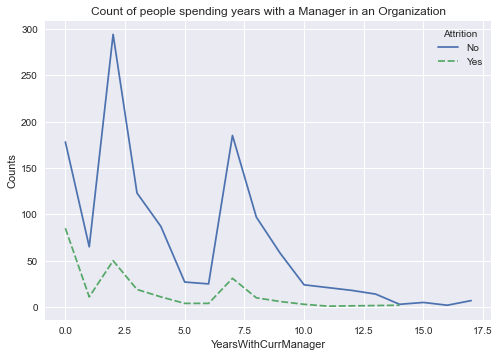

In [28]:
sns.lineplot(data=man_att, 
             x="YearsWithCurrManager", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Count of people spending years with a Manager in an Organization')
plt.savefig('man_att.png');

1. From the plot, we notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. 
2. At the very start, where the time spent with the manager is relatively less - people tend to leave their jobs - considering their relationship with their previous managers. 
3. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. 
4. When the time spent with the manager is slightly higher (about 7 years) - people tend to find their career progression stagnant, and tend to go for a change. 
5. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

***
<a id='Department'></a>
#### <b><span style='color:#68A19B'>3.7</span> | Department</b>

In [29]:
dept_att=df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

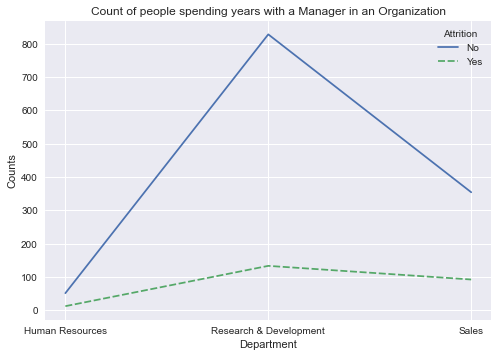

In [30]:
sns.lineplot(data=dept_att, 
             x="Department", y="Counts", 
             hue="Attrition", style="Attrition").set(title='Count of people spending years with a Manager in an Organization')
plt.savefig('dept_att.png');

1. This data comprises of only 3 major departments - among which Sales department has the highest attrition rates (20.63%), followed by the Human Resource Department (19.05%). 
2. Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above (13.83%).

***
# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Feature Engineering</p></div>

For feature engineering, we would like to check correlations between each features and tranform non numerical feature into numerical by different ways such as encoding so that we could be able to feed the feature to the model.

In [31]:
# tranform binary feature into 0 and 1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

***
<a id='Correlation'></a>
### <b><span style='color:#68A19B'>1</span> | Correlation</b>

In [32]:
# check correlation between numerical features and target variable
corr_score = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


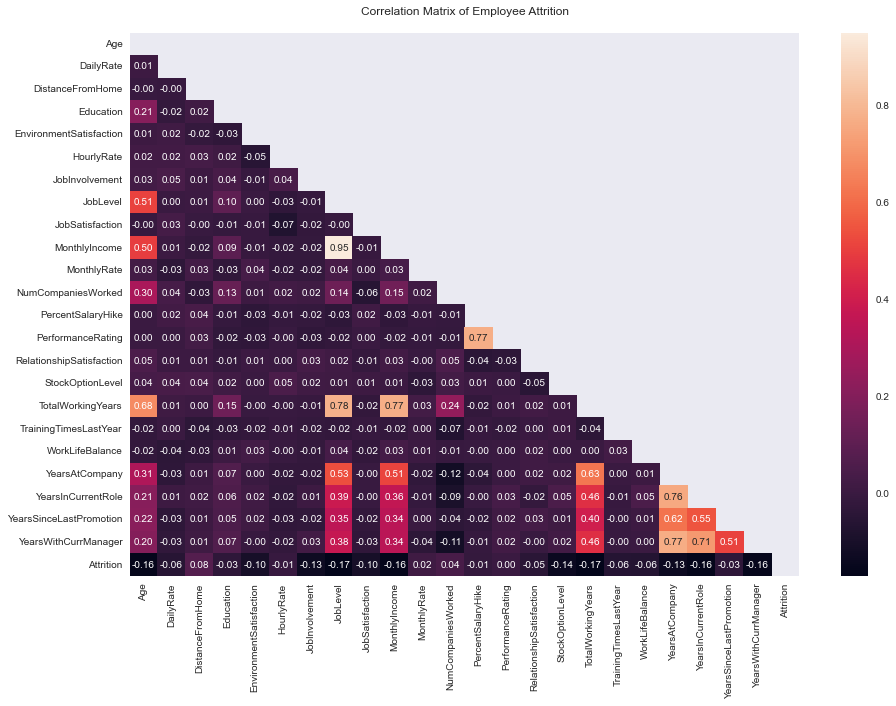

In [33]:
# visualization of correlation relationships
plt.figure(figsize=(15, 10))
mask = np.triu(corr_score)
sns.heatmap(corr_score,annot = True, fmt = '.2f',mask = mask).set_title('Correlation Matrix of Employee Attrition\n')
plt.savefig('corr.png');

In [34]:
# Drop the target column and get a clean dataframe with features
y = df['Attrition']
df_clean = df.drop(columns = ['Attrition'])

***
<a id='Encoding'></a>
### <b><span style='color:#68A19B'>2</span> | Encoding</b>

In [35]:
# apply one hot encoding to non numerical features
df_clean = pd.get_dummies(df_clean, columns = ['BusinessTravel', 'Gender','MaritalStatus'], drop_first = True)
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [36]:
# check the columns we have after feature engineering
print(list(df_clean.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Man

In [37]:
# check the shape for the new dataset
get_shape(df_clean)

Now there are 1470 rows and 48 columns in this dataset


In [38]:
# filter out features that needs to be standarized
col_tobe_standard = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

***
<a id='Standarization'></a>
### <b><span style='color:#68A19B'>3</span> | Standarization</b>

In [39]:
# standarization on numercial features so that all the numerical features are having the same type of normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in col_tobe_standard:
    df_clean[col] = df_clean[col].astype(float)
    df_clean[[col]] = scaler.fit_transform(df_clean[[col]])
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,0.742527,-1.010909,-0.891688,1,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.322365,-1.297775,-0.147150,-1.868426,2,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,0,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,4,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.429664,1.461466,-0.764121,1.061787,5,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,7,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,0,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


***
# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Model Training</p></div>

***
<a id='Split-Dataset'></a>
### <b><span style='color:#68A19B'>1</span> | Split Dataset</b>

In [40]:
# split dataset into training set and testing set with stratified sampling so that each dataset contains observations
# for both exit and non exit employees
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_clean,
                                                                    y,
                                                                    test_size=0.25,
                                                                    stratify = y)  
print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 1102 observation with 48 features
Test data has 368 observation with 48 features


In [41]:
# build different machine learning models with the same random state if applicable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)
mlp = MLPClassifier(random_state = 6)
xg = XGBClassifier(random_state = 6)

***
<a id='Naive-Approach'></a>
### <b><span style='color:#68A19B'>2</span> | Naive Approach</b>

In [42]:
# naive approach on each models without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp,xg]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

In [43]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN','Random Forest','Decision Tree','Neural Network','XG Boost']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  \
cv_1                0.864  0.805          0.846          0.756   
cv_2                0.878  0.824          0.851          0.747   
cv_3                0.895  0.818          0.850          0.800   
cv_4                0.886  0.832          0.850          0.805   
cv_5                0.895  0.823          0.855          0.795   

      Neural Network  XG Boost  
cv_1           0.814     0.846  
cv_2           0.891     0.882  
cv_3           0.859     0.877  
cv_4           0.873     0.864  
cv_5           0.927     0.877  


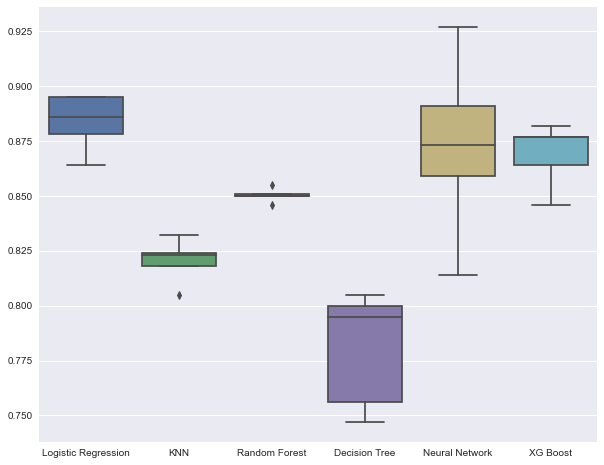

In [44]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png');

From the boxplot, we can see decision tree is not performaning well compared with other models.

***
<a id='Models'></a>
### <b><span style='color:#68A19B'>3</span> | Models</b>

In [45]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [46]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10, random_state = 6, shuffle = True)

***
<a id='Logistic-Regression'></a>
#### <b><span style='color:#68A19B'>3.1</span> | Logistic Regression</b>

In [47]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [48]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [49]:
lr_res = grid_lr.cv_results_

In [50]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.883
Best Parameters:
C : 5
penalty : l2


In [51]:
best_lr_model = grid_lr.best_estimator_

In [52]:
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

***
<a id='KNN'></a>
#### <b><span style='color:#68A19B'>3.2</span> | KNN</b>

In [53]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [54]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [55]:
knn_res = grid_knn.cv_results_

In [56]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.839
Best Parameters:
n_neighbors : 21


In [57]:
best_knn_model = grid_knn.best_estimator_

In [58]:
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

***
<a id='Random-Forest'></a>
#### <b><span style='color:#68A19B'>3.3</span> | Random Forest</b>

In [59]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [60]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.864
Best Parameters:
max_depth : 15
max_features : sqrt
min_samples_split : 4
n_estimators : 40


In [61]:
rf_res = grid_rf.cv_results_

In [62]:
best_rf_model = grid_rf.best_estimator_

In [63]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

***
<a id='Decision-Tree'></a>
#### <b><span style='color:#68A19B'>3.4</span> | Decision Tree</b>

In [64]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [65]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.835
Best Parameters:
max_depth : 1
min_samples_split : 2


In [66]:
best_dt_model = grid_dt.best_estimator_

In [67]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

***
<a id='Neural-Network'></a>
#### <b><span style='color:#68A19B'>3.5</span> | Neural Network</b>

In [68]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=MLPClassifier(random_state=6),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

In [69]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_mlp)

Best Score: 0.874
Best Parameters:
activation : relu
alpha : 0.1
hidden_layer_sizes : (20,)


In [70]:
best_mlp_model = grid_mlp.best_estimator_

In [71]:
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

***
<a id='XG-Boost'></a>
#### <b><span style='color:#68A19B'>3.6</span> | XG Boost</b>

In [72]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }

In [73]:
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 50)
grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                     

In [74]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)

Best Score: 0.885
Best Parameters:
subsample : 0.6
reg_lambda : 0.1
reg_alpha : 5
n_estimators : 80
max_depth : 1
learning_rate : 0.5
eta : 0.4


In [75]:
best_xgb_model = grid_xgb.best_estimator_

In [76]:
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

***
# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Performance Evaluation</p></div>

In [77]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network
Extreme Boosting Tree


***
<a id='Confusion-Matrix'></a>
### <b><span style='color:#68A19B'>1</span> | Confusion Matrix</b>

In [78]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names)
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecell = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

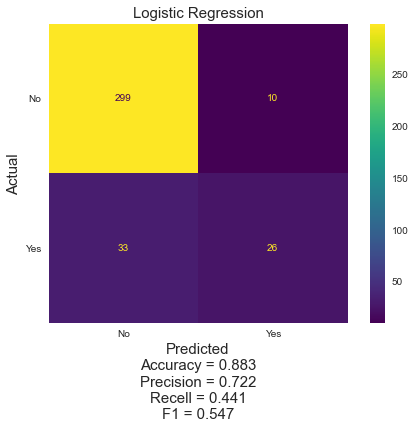

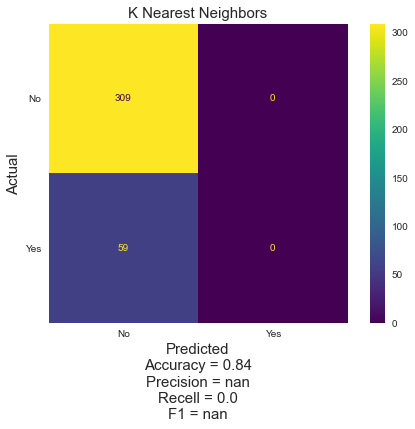

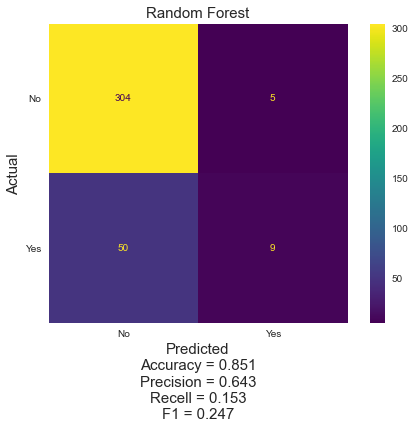

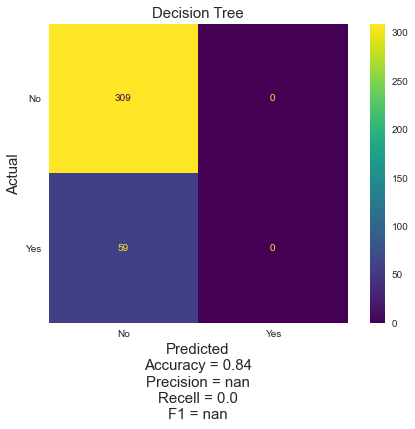

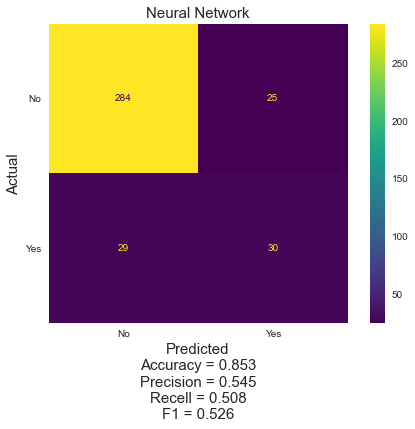

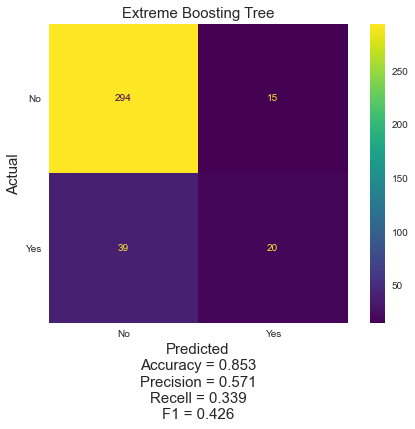

In [79]:
plot_cm(best_models)
plt.savefig('cm.png')

From the above summary, we observe that the tuned Logistic Regression performs the best among all that we tried.

***
<a id='ROC-Curve'></a>
#### <b><span style='color:#68A19B'>2</span> | ROC Curve</b>

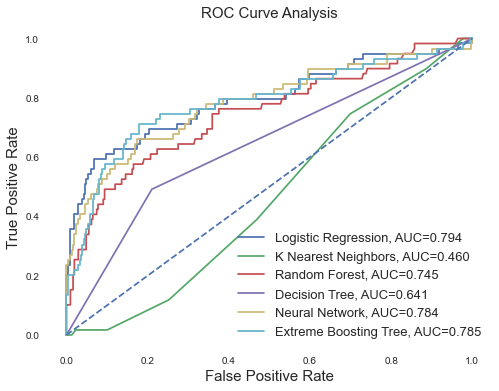

In [80]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');

***
# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;margin:0;text-align:center">Feature Selection</p></div>

***
<a id='Random-Forest'></a>
#### <b><span style='color:#68A19B'>1</span> | Random Forest</b>

In [81]:
# helper function to visualize feature importance from Random Forest
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'blue')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

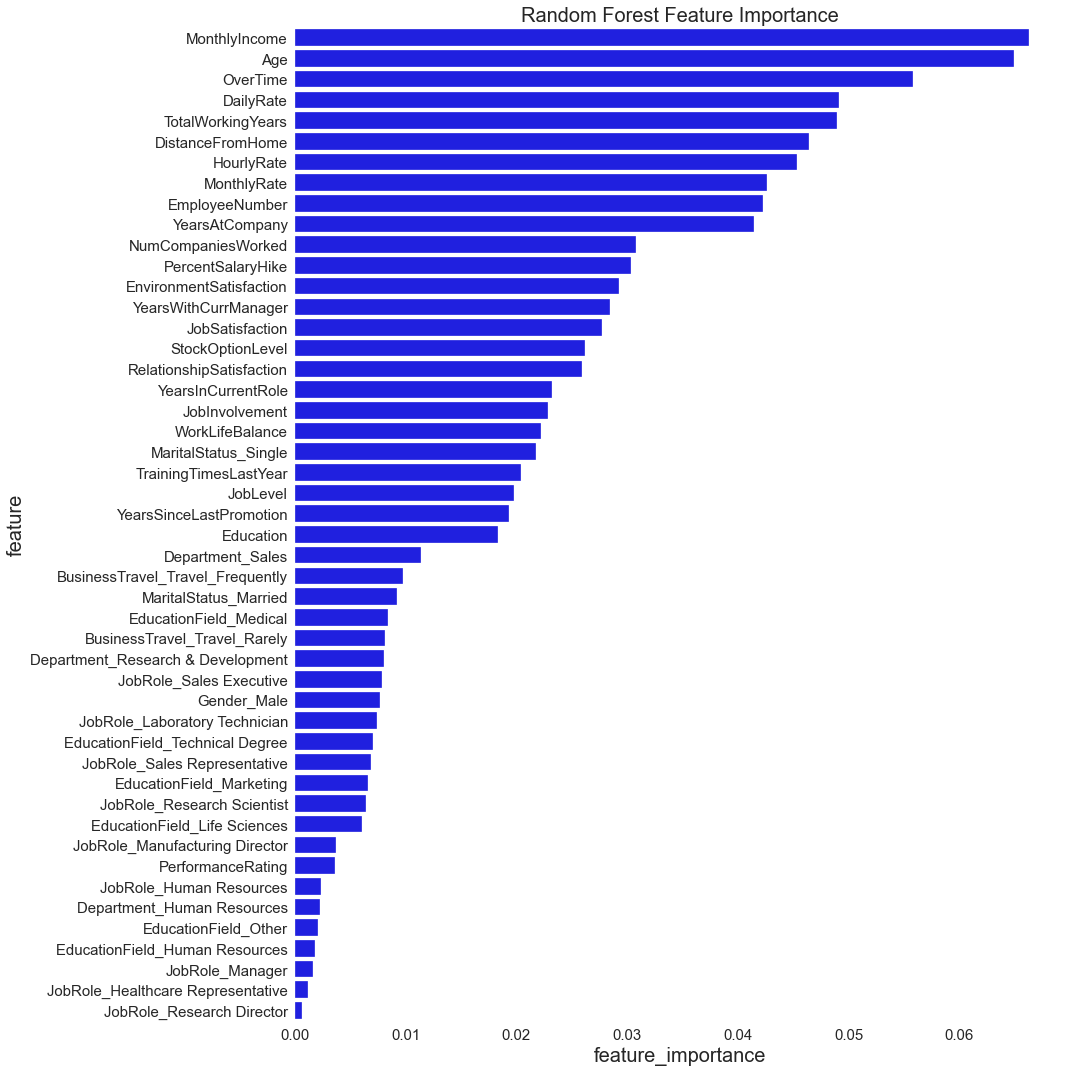

In [82]:
base_imp = imp_df(X_train.columns, best_rf_model.feature_importances_)
plt.figure(figsize=(15, 15))
var_imp_plot(base_imp, 'Random Forest Feature Importance')
plt.savefig('feature_importance.png')

Monthly income is the important feature using random forest model.

***
<a id='Lasso-Regression'></a>
#### <b><span style='color:#68A19B'>2</span> | Lasso Regression</b>

In [83]:
# build a LASSO model for feature selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.DataFrame(reg.coef_, index = X_train.columns)
coef = imp_df(X_train.columns, reg.coef_)

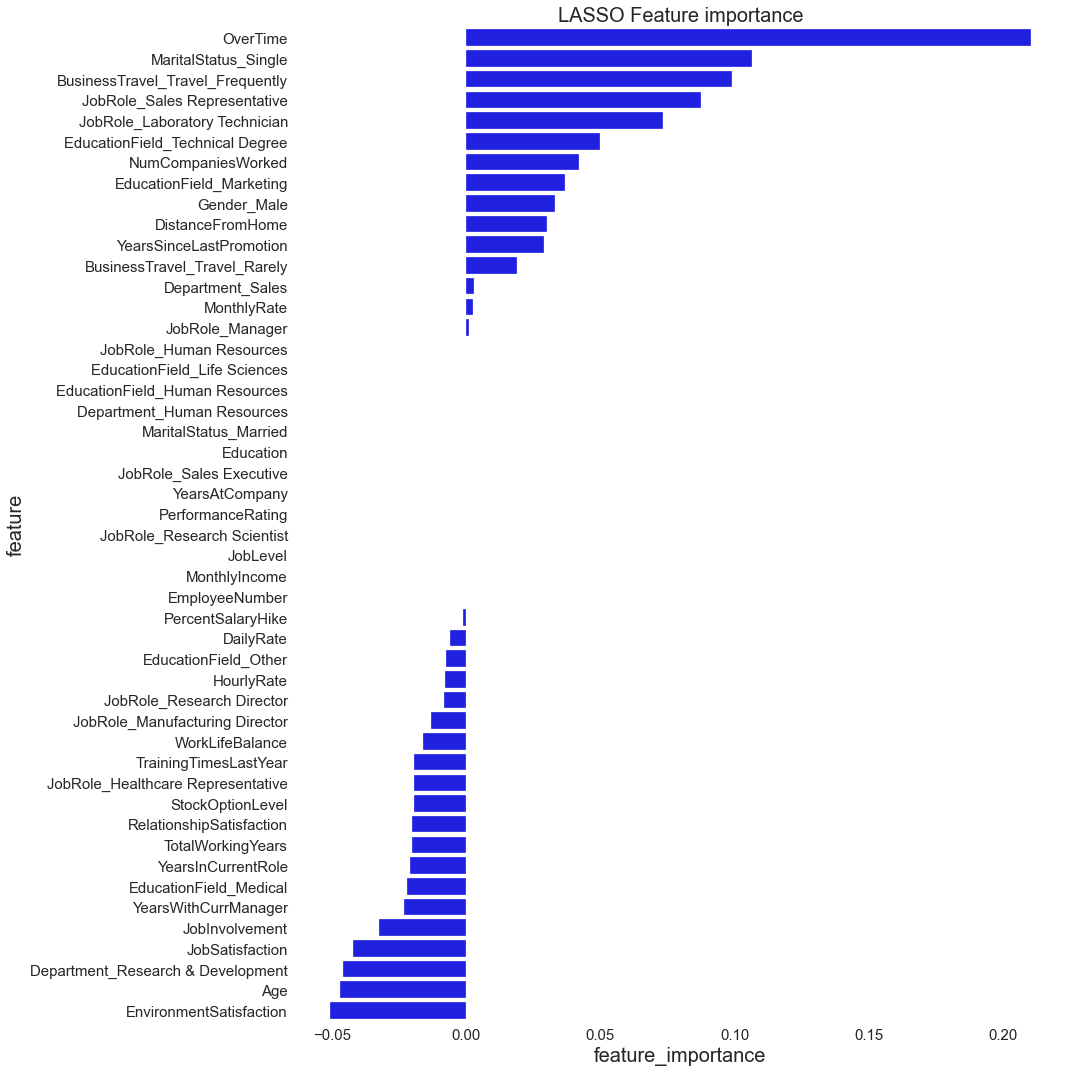

In [84]:
plt.figure(figsize=(15, 15))
var_imp_plot(coef, 'LASSO Feature importance')
plt.savefig('L1_feature_importance.png');

Over time is the important feature using Lasso regression.